# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nicholas
- **Email:** nicholas13245768@gmail.com
- **ID Dicoding:** nicholas_m002d4ky2609_DLG7


## Menentukan Pertanyaan Bisnis

- Bagaimana performa rental sepeda  terkini?
- Bulan berapakah yang memiliki jumlah rental sepeda terbesar?
- Bagaimana tren rental sepeda customer berdasarkan cuaca?
- Bagaimana tren rental sepeda customer berdasarkan suhu?
- Bagaimana tren rental sepeda customer berdasarkan musim?
- Performa rental sepeda berdasarkan hari libur
- Jumlah penyewaan rental sepeda berdasarkan jam
- Performa rental sepeda seiring berjalannya satu minggu operasi



## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
days_df = pd.read_csv('/content/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hours_df = pd.read_csv('/content/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Type Data**

In [ ]:
days_df.info()
print("\n")
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (t

Dapat dilihat bahwa dteday memiliki type object yang seharusnya bersifat datetime yang akan diperbaiki pada bagian Cleaning Data

**Null Checker**

In [ ]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang bersifat null

**Duplicated data**

In [ ]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Tidak ada data yang terduplikasi

**Data Analysis**

In [ ]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada masalah pada statistik data

| Dataset | Type Data | Null Data | Duplicated Data | Data statistics |
| --- | --- | --- | --- | --- |
| days_df | Date yang memiliki format string | - | - | - |
| hours_df | Date yang memiliki format string | - | - | - |

### Cleaning Data

In [ ]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])


In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [ ]:
df = days_df

### Explore

Mengubah season menjadi deskriptif agar lebih mudah dipahami

In [ ]:
weather_labels = {
    1: "Clear",
    2: "Mist",
    3: "Light Rain or Snow",
    4: "Heavy Rain or Snow",
}

df['weathersit'] = df['weathersit'].map(weather_labels)
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
317,318,2011-11-14,4,0,11,0,1,1,Clear,0.530000,0.524612,0.587083,0.306596,595,3891,4486
276,277,2011-10-04,4,0,10,0,2,1,Clear,0.484167,0.472858,0.710000,0.205854,486,3970,4456
641,642,2012-10-03,4,1,10,0,3,1,Mist,0.657500,0.599133,0.793750,0.066546,728,6844,7572
246,247,2011-09-04,3,0,9,0,0,0,Clear,0.709167,0.665429,0.742083,0.206467,2521,2419,4940
576,577,2012-07-30,3,1,7,0,1,1,Clear,0.730833,0.684987,0.668750,0.153617,1040,6065,7105
120,121,2011-05-01,2,0,5,0,0,0,Mist,0.451667,0.448204,0.762083,0.106354,1138,2213,3351
586,587,2012-08-09,3,1,8,0,4,1,Clear,0.755833,0.699508,0.620417,0.156100,1196,6090,7286
111,112,2011-04-22,2,0,4,0,5,1,Mist,0.336667,0.321954,0.729583,0.219521,177,1506,1683
410,411,2012-02-15,1,1,2,0,3,1,Clear,0.348333,0.351629,0.531250,0.181600,141,4028,4169
62,63,2011-03-04,1,0,3,0,5,1,Mist,0.261667,0.255679,0.610417,0.203346,214,1730,1944


In [ ]:
df.groupby(by="weathersit").agg({
    "cnt": "mean"
}).sort_values(by = "cnt",ascending = False)

,cnt
weathersit,
Clear,4876.786177
Mist,4035.862348
Light Rain or Snow,1803.285714


Beberapa insight yang dapat ditemui adalah tidak adanya rental sepeda saat terjadi badai dan jumlah rental sepeda cenderung lebih tinggi dengan baiknya cuaca

In [ ]:
df.groupby(by="mnth").agg({
    "cnt": "mean"
}).sort_values(by = "cnt",ascending = False)

,cnt
mnth,
6,5772.366667
9,5766.516667
8,5664.419355
7,5563.677419
5,5349.774194
10,5199.225806
4,4484.900000
11,4247.183333
3,3692.258065


Dapat terlihat bahwa pertengahan tahun cenderung memiliki jumlah rental sepeda yang lebih tinggi

In [ ]:
season_labels = {
    1: "Winter",
    2: "Spring",
    3: "Summer",
    4: "Fall",
}

df['season'] = df['season'].map(season_labels)
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
344,345,2011-12-11,Fall,0,12,0,0,0,Clear,0.220833,0.253154,0.490000,0.066542,377,2366,2743
484,485,2012-04-29,Spring,1,4,0,0,0,Clear,0.458333,0.450121,0.587083,0.116908,2229,4075,6304
101,102,2011-04-12,Spring,0,4,0,2,1,Mist,0.502500,0.493054,0.739167,0.274879,257,1777,2034
609,610,2012-09-01,Summer,1,9,0,6,0,Mist,0.753333,0.702654,0.638333,0.113187,2352,3788,6140
681,682,2012-11-12,Fall,1,11,1,1,0,Clear,0.485000,0.475383,0.741667,0.173517,1097,5172,6269
98,99,2011-04-09,Spring,0,4,0,6,0,Mist,0.342500,0.341529,0.877500,0.133083,879,1576,2455
452,453,2012-03-28,Spring,1,3,0,3,1,Clear,0.484167,0.470950,0.481250,0.291671,674,5024,5698
391,392,2012-01-27,Winter,1,1,0,5,1,Mist,0.425000,0.415383,0.741250,0.342667,269,3187,3456
714,715,2012-12-15,Fall,1,12,0,6,0,Clear,0.324167,0.338383,0.650417,0.106350,767,4280,5047
485,486,2012-04-30,Spring,1,4,0,1,1,Mist,0.464167,0.457696,0.570000,0.171638,665,4907,5572


In [ ]:
df.groupby(by="season").agg({
    "cnt": "mean"
}).sort_values(by = "cnt",ascending = False)

,cnt
season,
Summer,5644.303191
Spring,4992.331522
Fall,4728.162921
Winter,2604.132597


Jumlah rental sepeda pada musim gugur memiliki jumlah tertinggi dengan jumlah yang tidak beda jauh dengan musim panas dan musim salju. Musim semi memiliki jumlah rental sepeda terrendah dengan 2604 rental.

In [ ]:
holiday_labels = {
    0: "Holiday",
    1: "Workday",
}

df['workingday'] = df['workingday'].map(holiday_labels)
df.sample(10)
df = df.drop(['holiday'],axis=1)
df.rename(columns = {'workingday':'holiday'}, inplace = True)

In [ ]:
df.sample(10)

,instant,dteday,season,yr,mnth,weekday,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
468,469,2012-04-13,Spring,1,4,5,Workday,Clear,0.442500,0.431808,0.408333,0.155471,1252,5146,6398
307,308,2011-11-04,Fall,0,11,5,Workday,Mist,0.403333,0.403392,0.622500,0.271779,470,3576,4046
572,573,2012-07-26,Summer,1,7,4,Workday,Clear,0.776667,0.739263,0.596667,0.284813,1036,5825,6861
499,500,2012-05-14,Spring,1,5,1,Workday,Mist,0.573333,0.549900,0.789583,0.212692,342,2501,2843
144,145,2011-05-25,Spring,0,5,3,Workday,Clear,0.660833,0.615542,0.696250,0.154233,740,4238,4978
211,212,2011-07-31,Summer,0,7,0,Holiday,Clear,0.805833,0.729796,0.480833,0.164813,1524,2778,4302
204,205,2011-07-24,Summer,0,7,0,Holiday,Clear,0.830000,0.794829,0.550833,0.169171,1050,2556,3606
494,495,2012-05-09,Spring,1,5,3,Workday,Mist,0.575000,0.553025,0.744167,0.216412,620,4097,4717
222,223,2011-08-11,Summer,0,8,4,Workday,Clear,0.717500,0.651521,0.423750,0.164796,812,3980,4792
317,318,2011-11-14,Fall,0,11,1,Workday,Clear,0.530000,0.524612,0.587083,0.306596,595,3891,4486


In [ ]:
df.groupby(by="holiday").agg({
    "cnt": "mean"
}).sort_values(by = "cnt",ascending = False)

,cnt
holiday,
Workday,4584.820000
Holiday,4330.168831


Dapat terlihat bahwa workday memiliki jumlah rental sepeda yang lebih banyak daripada holiday.

In [ ]:
day_labels = {
    0: 'Sunday',
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: 'Friday',
    6: 'Saturday',
}

df['weekday'] = df['weekday'].map(day_labels)
df.sample(10)

,instant,dteday,season,yr,mnth,weekday,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
648,649,2012-10-10,Fall,1,10,Wednesday,Workday,Clear,0.514167,0.503142,0.630833,0.187821,780,6911,7691
726,727,2012-12-27,Winter,1,12,Thursday,Workday,Mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
32,33,2011-02-02,Winter,0,2,Wednesday,Workday,Mist,0.260000,0.254417,0.775417,0.264308,72,1454,1526
333,334,2011-11-30,Fall,0,11,Wednesday,Workday,Clear,0.325000,0.311221,0.613333,0.271158,188,3425,3613
50,51,2011-02-20,Winter,0,2,Sunday,Holiday,Clear,0.285217,0.277330,0.407826,0.223235,639,1173,1812
110,111,2011-04-21,Spring,0,4,Thursday,Workday,Clear,0.459167,0.453892,0.407083,0.325258,745,3444,4189
296,297,2011-10-24,Fall,0,10,Monday,Workday,Clear,0.463333,0.457067,0.772083,0.118792,699,3488,4187
486,487,2012-05-01,Spring,1,5,Tuesday,Workday,Mist,0.613333,0.577021,0.659583,0.156096,653,5087,5740
290,291,2011-10-18,Fall,0,10,Tuesday,Workday,Mist,0.532500,0.522721,0.701667,0.110087,637,4111,4748
346,347,2011-12-13,Fall,0,12,Tuesday,Workday,Clear,0.282500,0.301138,0.590000,0.140550,155,3368,3523


In [ ]:
df.groupby(by="weekday").agg({
    "cnt": "mean"
}).sort_values(by = "cnt",ascending = False)

,cnt
weekday,
Friday,4690.288462
Thursday,4667.259615
Saturday,4550.542857
Wednesday,4548.538462
Tuesday,4510.663462
Monday,4338.123810
Sunday,4228.828571


In [ ]:
hours_df.groupby(by="hr").agg({
    "cnt": "mean"
}).sort_values(by = "cnt",ascending = False)

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


Tidak ada perbedaan signifikan antara hari berdasarkan jumlah rental sepeda. Akan tetapi terdapat perbedaan yang cukup besar pada jam dimana sore dan siang memiliki jumlah rental sepeda tertinggi

In [ ]:
correlation_matrix = days_df.corr()
correlation_matrix

<ipython-input-37-872bde32fe99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = days_df.corr()


,instant,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.496702,0.016145,-0.000016,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,-0.001792,0.007954,-0.005461,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,-0.001792,1.000000,0.019191,0.009509,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.007954,0.019191,1.000000,-0.101960,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.005461,0.009509,-0.101960,1.000000,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
temp,0.150580,0.047604,0.220205,-0.028556,-0.000170,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,0.227459,-0.032507,-0.007537,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,0.222204,-0.015937,-0.052232,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,-0.207502,0.006292,0.014282,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.123006,0.054274,0.059923,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804


## Visualization & Explanatory Analysis

- Bagaimana performa rental sepeda terkini?
- Bulan berapakah yang memiliki jumlah rental sepeda terbesar?
- Bagaimana tren rental sepeda customer berdasarkan cuaca?
- Bagaimana tren rental sepeda customer berdasarkan suhu?
- Bagaimana tren rental sepeda customer berdasarkan musim?
- Performa rental sepeda berdasarkan hari libur
- Jumlah penyewaan rental sepeda berdasarkan jam
- Performa rental sepeda seiring berjalannya satu minggu operasi

### Pertanyaan 1:

In [ ]:
df_date = df[["cnt","dteday"]]
# Set the 'datetime_column' as the index of the DataFrame if it's not already
df_date.set_index('dteday', inplace=True)

# Resample the datetime series on 15-day intervals and apply any desired aggregation function (e.g., count)
result = df_date.resample('5D').mean()

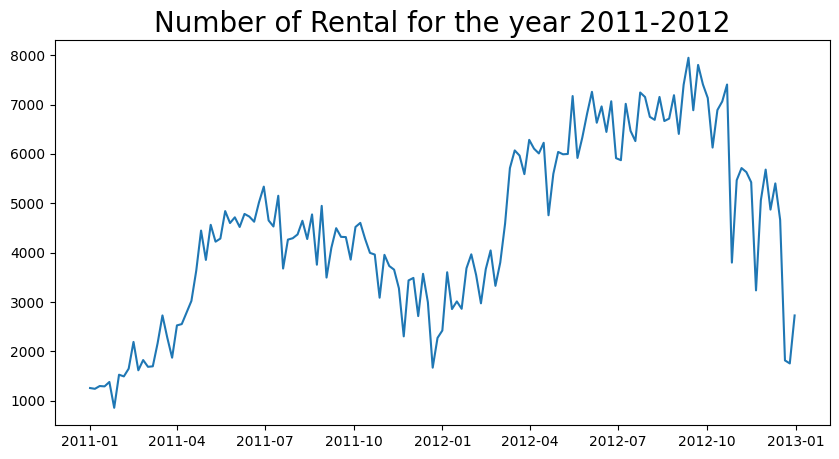

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(result.index, result["cnt"])
plt.title("Number of Rental for the year 2011-2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

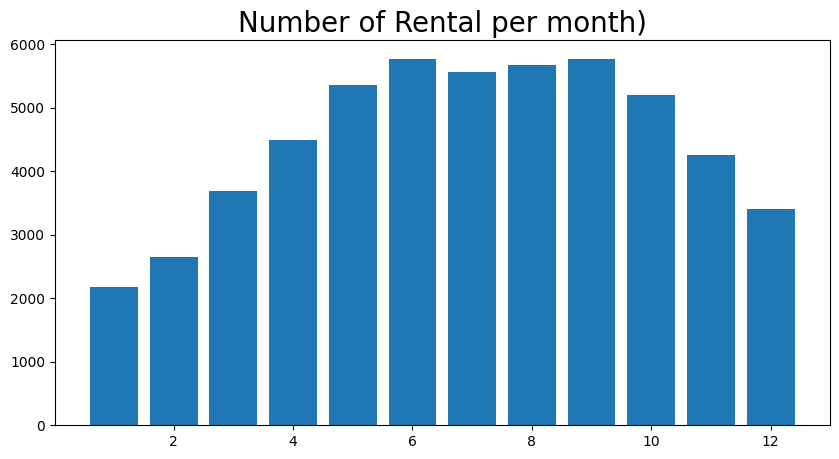

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df.groupby('mnth')['cnt'].mean().index, df.groupby('mnth')['cnt'].mean().values)
plt.title("Number of Rental per month)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Pertanyaan 3

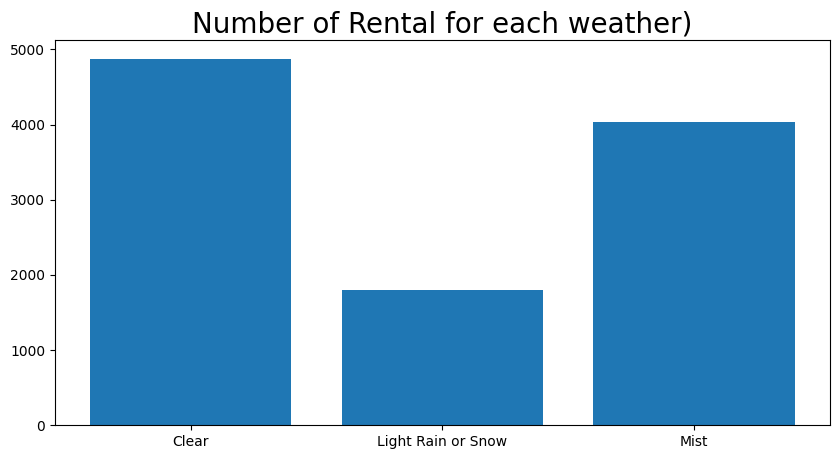

In [ ]:
plt.figure(figsize=(10, 5))
stats = df.groupby('weathersit')['cnt'].mean()
plt.bar(stats.index, stats.values)
plt.title("Number of Rental for each weather)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#Pertanyaan 4

In [ ]:
df_temp = df[["cnt","temp"]]
df_temp = df_temp.assign(temp_rounded = lambda x: (round(((x['temp'])*47)-8)*20)/20)
df_temp.describe()

,cnt,temp,temp_rounded
count,731.000000,731.000000,731.000000
mean,4504.348837,0.495385,15.281806
std,1937.211452,0.183051,8.609166
min,22.000000,0.059130,-5.000000
25%,3152.000000,0.337083,8.000000
50%,4548.000000,0.498333,15.000000
75%,5956.000000,0.655417,23.000000
max,8714.000000,0.861667,32.000000


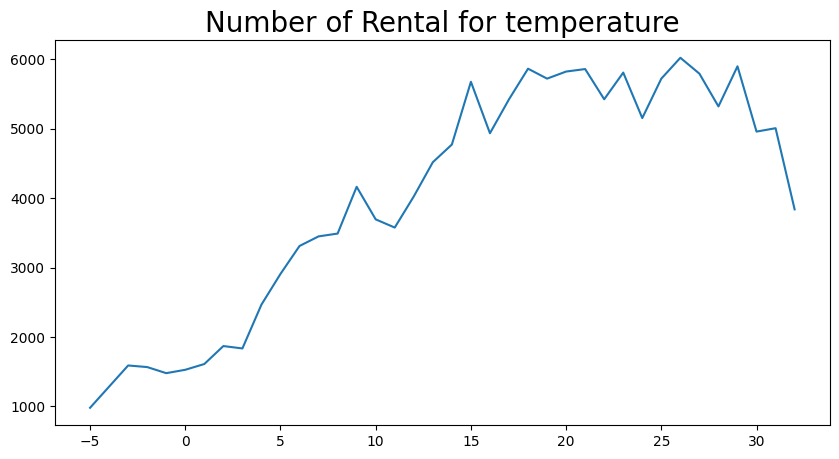

In [ ]:
plt.figure(figsize=(10, 5))
stats = df_temp.groupby('temp_rounded')['cnt'].mean()
plt.plot(stats.index, stats.values)
plt.title("Number of Rental for temperature", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Pertanyaan 5

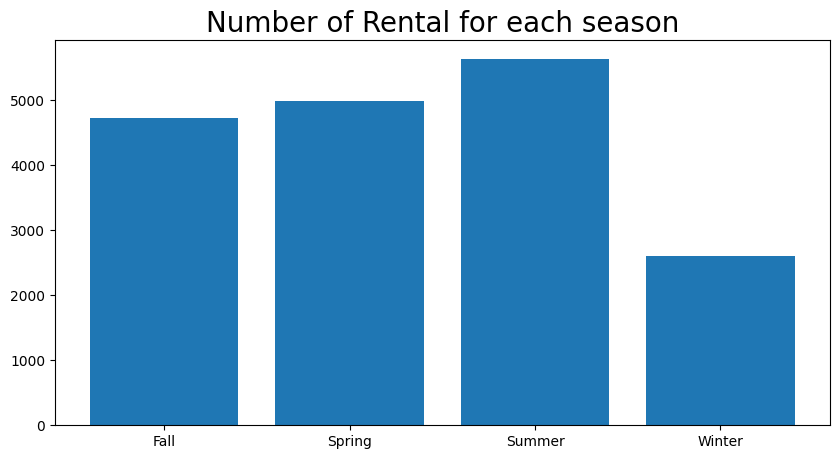

In [ ]:
plt.figure(figsize=(10, 5))
stats = df.groupby('season')['cnt'].mean()
plt.bar(stats.index, stats.values)
plt.title("Number of Rental for each season", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Pertanyaan 6

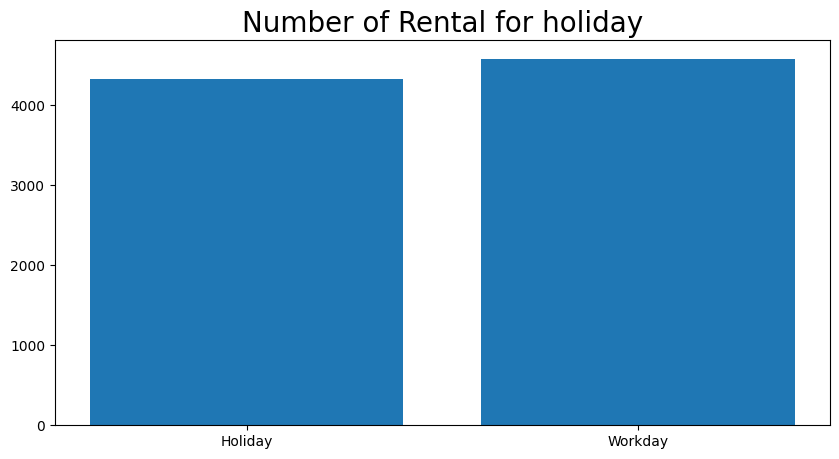

In [ ]:
plt.figure(figsize=(10, 5))
stats = df.groupby('holiday')['cnt'].mean()
plt.bar(stats.index, stats.values)
plt.title("Number of Rental for holiday", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Pertanyaan 7

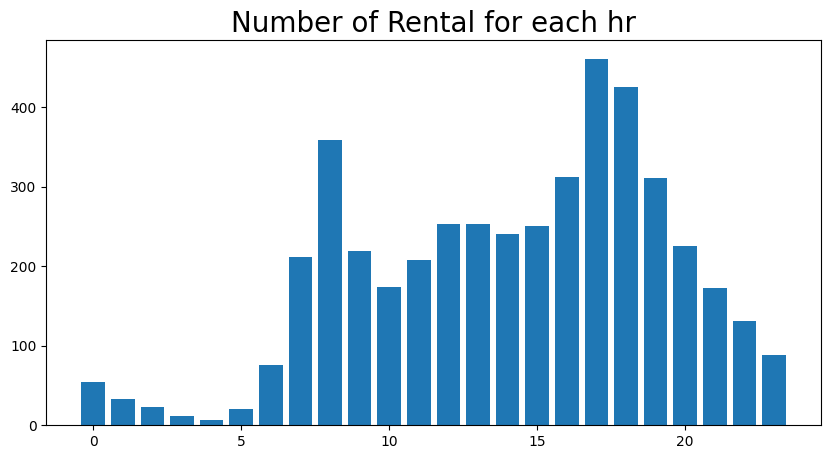

In [ ]:
plt.figure(figsize=(10, 5))
stats = hours_df.groupby('hr')['cnt'].mean()
plt.bar(stats.index, stats.values)
plt.title("Number of Rental for each hr", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Pertanyaan 8

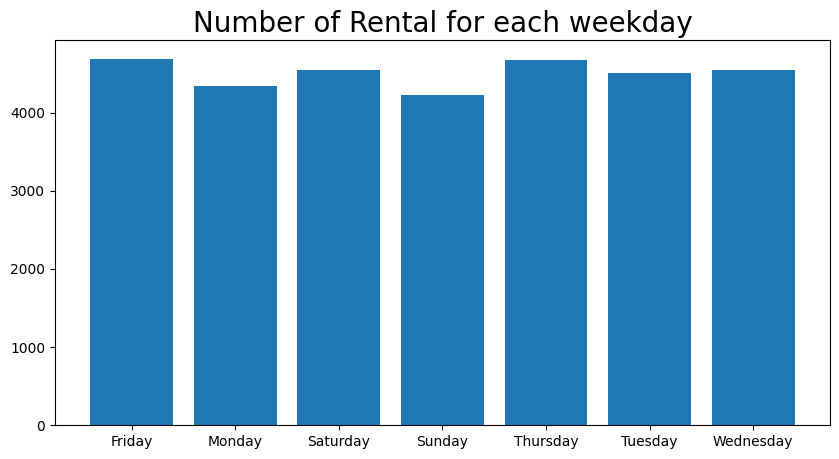

In [ ]:
plt.figure(figsize=(10, 5))
stats = df.groupby('weekday')['cnt'].mean()
plt.bar(stats.index, stats.values)
plt.title("Number of Rental for each weekday", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Conclusion

- Conclusion pertanyaan 1: Jumlah rental sepeda memiliki bentuk yang menyerupai gunung dengan puncak yang ada pada pertengahan tahun.
  - **Iklim yang mendukung pada pertengahan tahun**: Cuaca pada pertengahan tahun memiliki suhu yang mendukung yaitu pada saat musim semi, panas dan gugur yang tidak terlalu dingin setelah musim dingin
  - **Kesibukan**: Terdapat lebih banyak kesibukan saat musim lainnya dibandingkan musim dingin sehingga diperlukan sepeda sebagai transportasi yang lebih cepat.
- Conclusion pertanyaan 2:  Sesuai dengan pertanyaan 1, bulan 12, 1 dan 2 memiliki rental yang rendah dengan jumlah yang meningkat semakin jauh dari bulan-bulan tersebut dan mengecil semakin mendekat bulan 12.
  - **Cuaca yang lebih hangat**: Cuaca yang lebih mendukung pada musim lain dibandingkan musim dingin mendorong meningkatnya rental sepeda.
  - **Kesibukan**: Terdapat lebih banyak kesibukan saat musim lainnya dibandingkan musim dingin sehingga diperlukan sepeda sebagai transportasi yang lebih cepat.
- Conclusion pertanyaan 3:  Cuaca yang lebih baik memiliki jumlah rental sepeda yang lebih tinggi
  - **Cuaca yang mendukung**: Cuaca dan suhu yang lebih mendukung membuat orang orang lebih antusias untuk beraktivitas.
  - **Toko rental yang tutup**: Cuaca buruk memungkinkan toko rental untuk tutup dan tidak menerima pelanggan.
- Conclusion pertanyaan 4: Suhu yang lebih tinggi terutama pada rentang 20-30 memiliki tingkat rental yang lebih tinggi.
  - **Cuaca yang mendukung**: Cuaca dan suhu yang lebih mendukung membuat orang orang lebih antusias untuk beraktivitas.
- Conclusion pertanyaan 5: Musim dingin memiliki rental yang paling rendah dibandingkan dengan musim lainnya
  - **Suhu Dingin** : Suhu yang dingin mendorong orang-orang untuk tetap di rumah untuk mendapatkan kehangatan.
  - **Toko rental yang tutup**: Musim yang tidak bersahabat memungkinkan toko rental untuk tutup dan tidak menerima pelanggan.
- Conclusion pertanyaan 6:  Rental pada holiday dan workday memiliki perbedaan yang tidak signifikan
- Conclusion pertanyaan 7: Rental sepeda memiliki jumlah yang tinggi pada jam 8 pagi dan siang namun memiliki jumlah rental yang sepi saat subuh.
  - **Aktivitas**: Konklusi ini bersesuaian dengan jam waktu aktivitas orang-orang pada umumnya.
- Conclusion pertanyaan 8: Rental sepeda tidak memiliki perbedaan yang signifikan berdasarkan hari

In [ ]:
df.to_csv("data.csv")